# Importing libraries

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

# Data preprocessing

## Data renaming

In [2]:
# Function to rename multiple files 

def main(): 
  
    for count, filename in enumerate(os.listdir('../Plant_leave_diseases_dataset_with_augmentation/Apple_Apple_scab')): 
        root = '../Plant_leave_diseases_dataset_with_augmentation/Apple_Apple_scab'
        src = root +'/'+ filename 
        dst =root + "/scab" + str(count) + ".jpg"
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 

# Driver Code 
if __name__ == '__main__':
    
#calling the function
    main()

## Train, valid, test

In [3]:
#proportions
print(0.77*1001)
print(0.15*1001)
print(0.08*1001)

770.77
150.15
80.08


In [2]:
print(1001*0.77)
print(1001*0.15)
print(1001*0.08)

770.77
150.15
80.08


In [ ]:
# Organize data into train, valid, test folder randomly from the whole data

def List_paths (folders_create):
    train = ['train/'+i for i in folders_create]
    valid = ['valid/'+i for i in folders_create]
    test =  ['test/'+i for i in folders_create]

    List_paths = train+valid+test
    return List_paths

#Dir = where to (the path of the directory)
#List_paths = list of paths to create the folders

def folders (Dir,List_paths ):
    import os
    os.chdir(Dir) # to redirect to the directory that we want
    if os.path.isdir(List_paths[0]) is False: # checking if it exists, if not apply:
        for i in List_paths:
            os.makedirs(i)
            
#applying the function to create the folders

folders(Dir,List_paths(folders_create))

In [ ]:
#List_source = paths to get the files from
#List_dest = paths to put the files to
#List_num_files = number of files per train, valid and test (integers)

def move_files (Dir,List_source,folders_create,num):

    import glob
    import random
    import shutil
    import os
    os.chdir(Dir)
    n=0
    for item in List_source:
        #train
        for i in random.sample(glob.glob(item), num[0]):
            shutil.move(i, 'train/'+folders_create[n])

        #valid
        for i in random.sample(glob.glob(item), num[1]):
            shutil.move(i, 'valid/'+folders_create[n])

        #test
        for i in random.sample(glob.glob(item), num[2]):
            shutil.move(i, 'test/'+folders_create[n])
        n+=1
    os.chdir('../../')

In [1]:
Dir = '../AllCropsTest'
folders_create = sorted(['apple_healthy','apple_scab','apple_rot','apple_rust','cherry_healthy',
'cherry_powderymildew','corn_healthy','corn_rust','corn_cercospora','corn_blight',
'grape_healthy','grape_rot','grape_blackmeasles','grape_blight','peach_healthy',
'peach_bacterialspot','pepper_healthy','pepper_bacterialspot','potato_healthy',
'potato_earlyblight','potato_lateblight','strawberry_healthy','strawberry_scorch',
'tomato_healthy','tomato_bacterialspot','tomato_earlyblight','tomato_lateblight',
'tomato_mold','tomato_septoria','tomato_spidermite','tomato_targetspot',
'tomato_mosaicvirus','tomato_leafcurl'])

List_source = sorted(os.listdir('../AllCropsTest'))[1:-3]
num = [770,150,80]

# to create the files

#folders(Dir,List_paths(folders_create))

In [ ]:
# to move the files

move_files(Dir,List_source,folders_create,num)

## Batches

In [2]:
# we need the paths (relative wasn't working so absolute we go)

train_path = '/Users/mireiaguinovart/Documents/Ironhack/project_8/Project-Week-8-Final-Project/PlantVillageAUG/train'
valid_path = '/Users/mireiaguinovart/Documents/Ironhack/8-project_8/Project-Week-8-Final-Project/PlantVillageAUG/valid'
test_path = '/Users/mireiaguinovart/Documents/Ironhack/project_8/Project-Week-8-Final-Project/PlantVillageAUG/test'

In [3]:
# puting the data in the format of a Keras generator

'''Necessary to define the size of the images so they are all the same, it can be different
batch_size can be different too I guess'''

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=labels)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=labels)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=labels, shuffle=False)

#shuffle = False for test since we need to access the unshuffled data and by default it gets shuffled

Found 3080 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 320 images belonging to 4 classes.


## Visualise data

In [7]:
# grab a single batch of images and labels

imgs, labels = next(train_batches)

In [8]:
# this function will plot images in the form of a grid with the 1 row and 10 columns where the images are placed
# from the tensor flow website

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

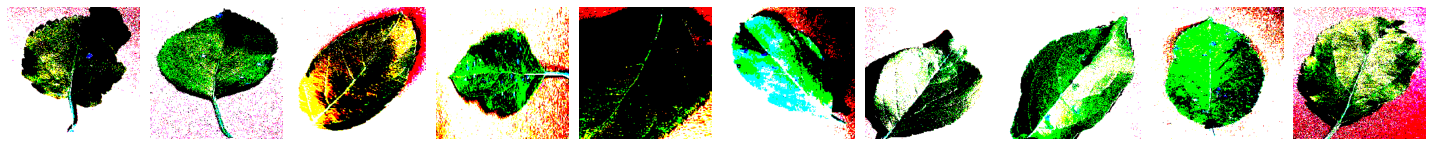

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [9]:
# it will print the BATCH
# the colours might look weird do to the preprocessing
plotImages(imgs)
print(labels)

# Model

In [10]:
# importing the model

vgg16_model = tf.keras.applications.vgg16.VGG16()

In [11]:
'''we have replicated the entire vgg16_model (excluding the output layer) 
to a new Sequential model (adding the layers one by one)'''

AllCropsModel = Sequential()
for layer in vgg16_model.layers[:-1]:
    AllCropsModel.add(layer)

In [12]:
# freezing the weights of what was imported from VGG16

for layer in AllCropsModel.layers:
    layer.trainable = False

In [13]:
# we add the output layer that will identify healthy and the 3 diseases 
# (rot, scab,rust)

AllCropsModel.add(Dense(units=4, activation='softmax'))

In [15]:
# optimise the data

AllCropsModel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model

In [16]:
#fitting the model to our data

AllCropsModel.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Train for 308 steps, validate for 60 steps
Epoch 1/5
308/308 - 1022s - loss: 0.6351 - accuracy: 0.7721 - val_loss: 0.3150 - val_accuracy: 0.9183
Epoch 2/5
308/308 - 1007s - loss: 0.2214 - accuracy: 0.9403 - val_loss: 0.2151 - val_accuracy: 0.9467
Epoch 3/5
308/308 - 1002s - loss: 0.1528 - accuracy: 0.9623 - val_loss: 0.1660 - val_accuracy: 0.9617
Epoch 4/5
308/308 - 1311s - loss: 0.1184 - accuracy: 0.9701 - val_loss: 0.1417 - val_accuracy: 0.9650
Epoch 5/5
308/308 - 1038s - loss: 0.0970 - accuracy: 0.9769 - val_loss: 0.1263 - val_accuracy: 0.9717


# Predictions + confusion matrix

In [18]:
predictions = AllCropsModel.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [19]:
'''NOT SURE IT'LL WORK'''

# directly from scikit-learn a function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
# so we know how to pass the classes later when we want to plot it

test_batches.class_indices

{'healthy': 0, 'rot': 1, 'rust': 2, 'scab': 3}

Confusion matrix, without normalization
[[78  1  0  1]
 [ 0 80  0  0]
 [ 0  1 79  0]
 [ 2  2  0 76]]


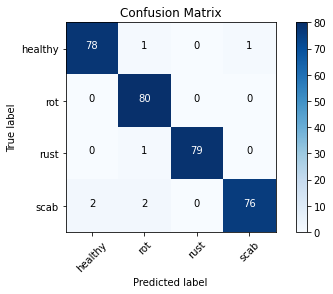

In [22]:
# we are using the confusion matrix creator function that we ran for the simpler model

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

# assigning the right labels and then plotting it

cm_plot_labels = ['healthy','rot','rust','scab']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Saving the model

In [23]:
# saving the model

AllCropsModel.save('Project-Week-8-Final-Project/your-project/AllCropsModel')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: modelApples/assets


In [28]:
# loading it back

allcrops_model = keras.models.load_model('Project-Week-8-Final-Project/your-project/modelApples')